In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
housing_data=pd.read_csv("/content/IndiaHousingData.csv")
housing_data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Population Density per sq km,Price
0,6762810145,5/1/2016,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,3387,3186106.0
1,6762810635,5/1/2016,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,526,1473640.0
2,6762810998,5/1/2016,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,766,1291920.0
3,6762812605,5/1/2016,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,825,907135.0
4,6762812919,5/1/2016,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,2480,1004640.0


In [3]:
housing_data.shape

(14620, 24)

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  object 
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

There is no missing data as there is no null value

Majority of data is continous except data

Dropping Id columns as it is of no use

In [5]:
housing_data= housing_data.drop(['id'], axis=1)

In [6]:
#Lets us know frequency of variables

In [7]:
cols=housing_data.select_dtypes(["int64",'float64']).columns

In [8]:
cols

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport',
       'Population Density per sq km', 'Price'],
      dtype='object')

In [9]:
for col in cols:
  print("\n")
  print("Variable name is", col, " and distribution of same is as under:")
  print(housing_data[col].value_counts().head())
  print("No. of unique enteries in varaible are:", housing_data[col].value_counts().shape[0])
  print('*************************************************')



Variable name is number of bedrooms  and distribution of same is as under:
3    6612
4    4724
2    1844
5    1079
6     176
Name: number of bedrooms, dtype: int64
No. of unique enteries in varaible are: 12
*************************************************


Variable name is number of bathrooms  and distribution of same is as under:
2.50    3678
1.00    2509
1.75    2062
2.25    1378
2.00    1323
Name: number of bathrooms, dtype: int64
No. of unique enteries in varaible are: 29
*************************************************


Variable name is living area  and distribution of same is as under:
1400    93
1010    92
1320    91
1660    90
1820    88
Name: living area, dtype: int64
No. of unique enteries in varaible are: 865
*************************************************


Variable name is lot area  and distribution of same is as under:
5000    269
6000    176
4000    172
7200    149
7500     82
Name: lot area, dtype: int64
No. of unique enteries in varaible are: 7451
*************

In [10]:
#Let us check variation of all the variables using box plot for clear picture

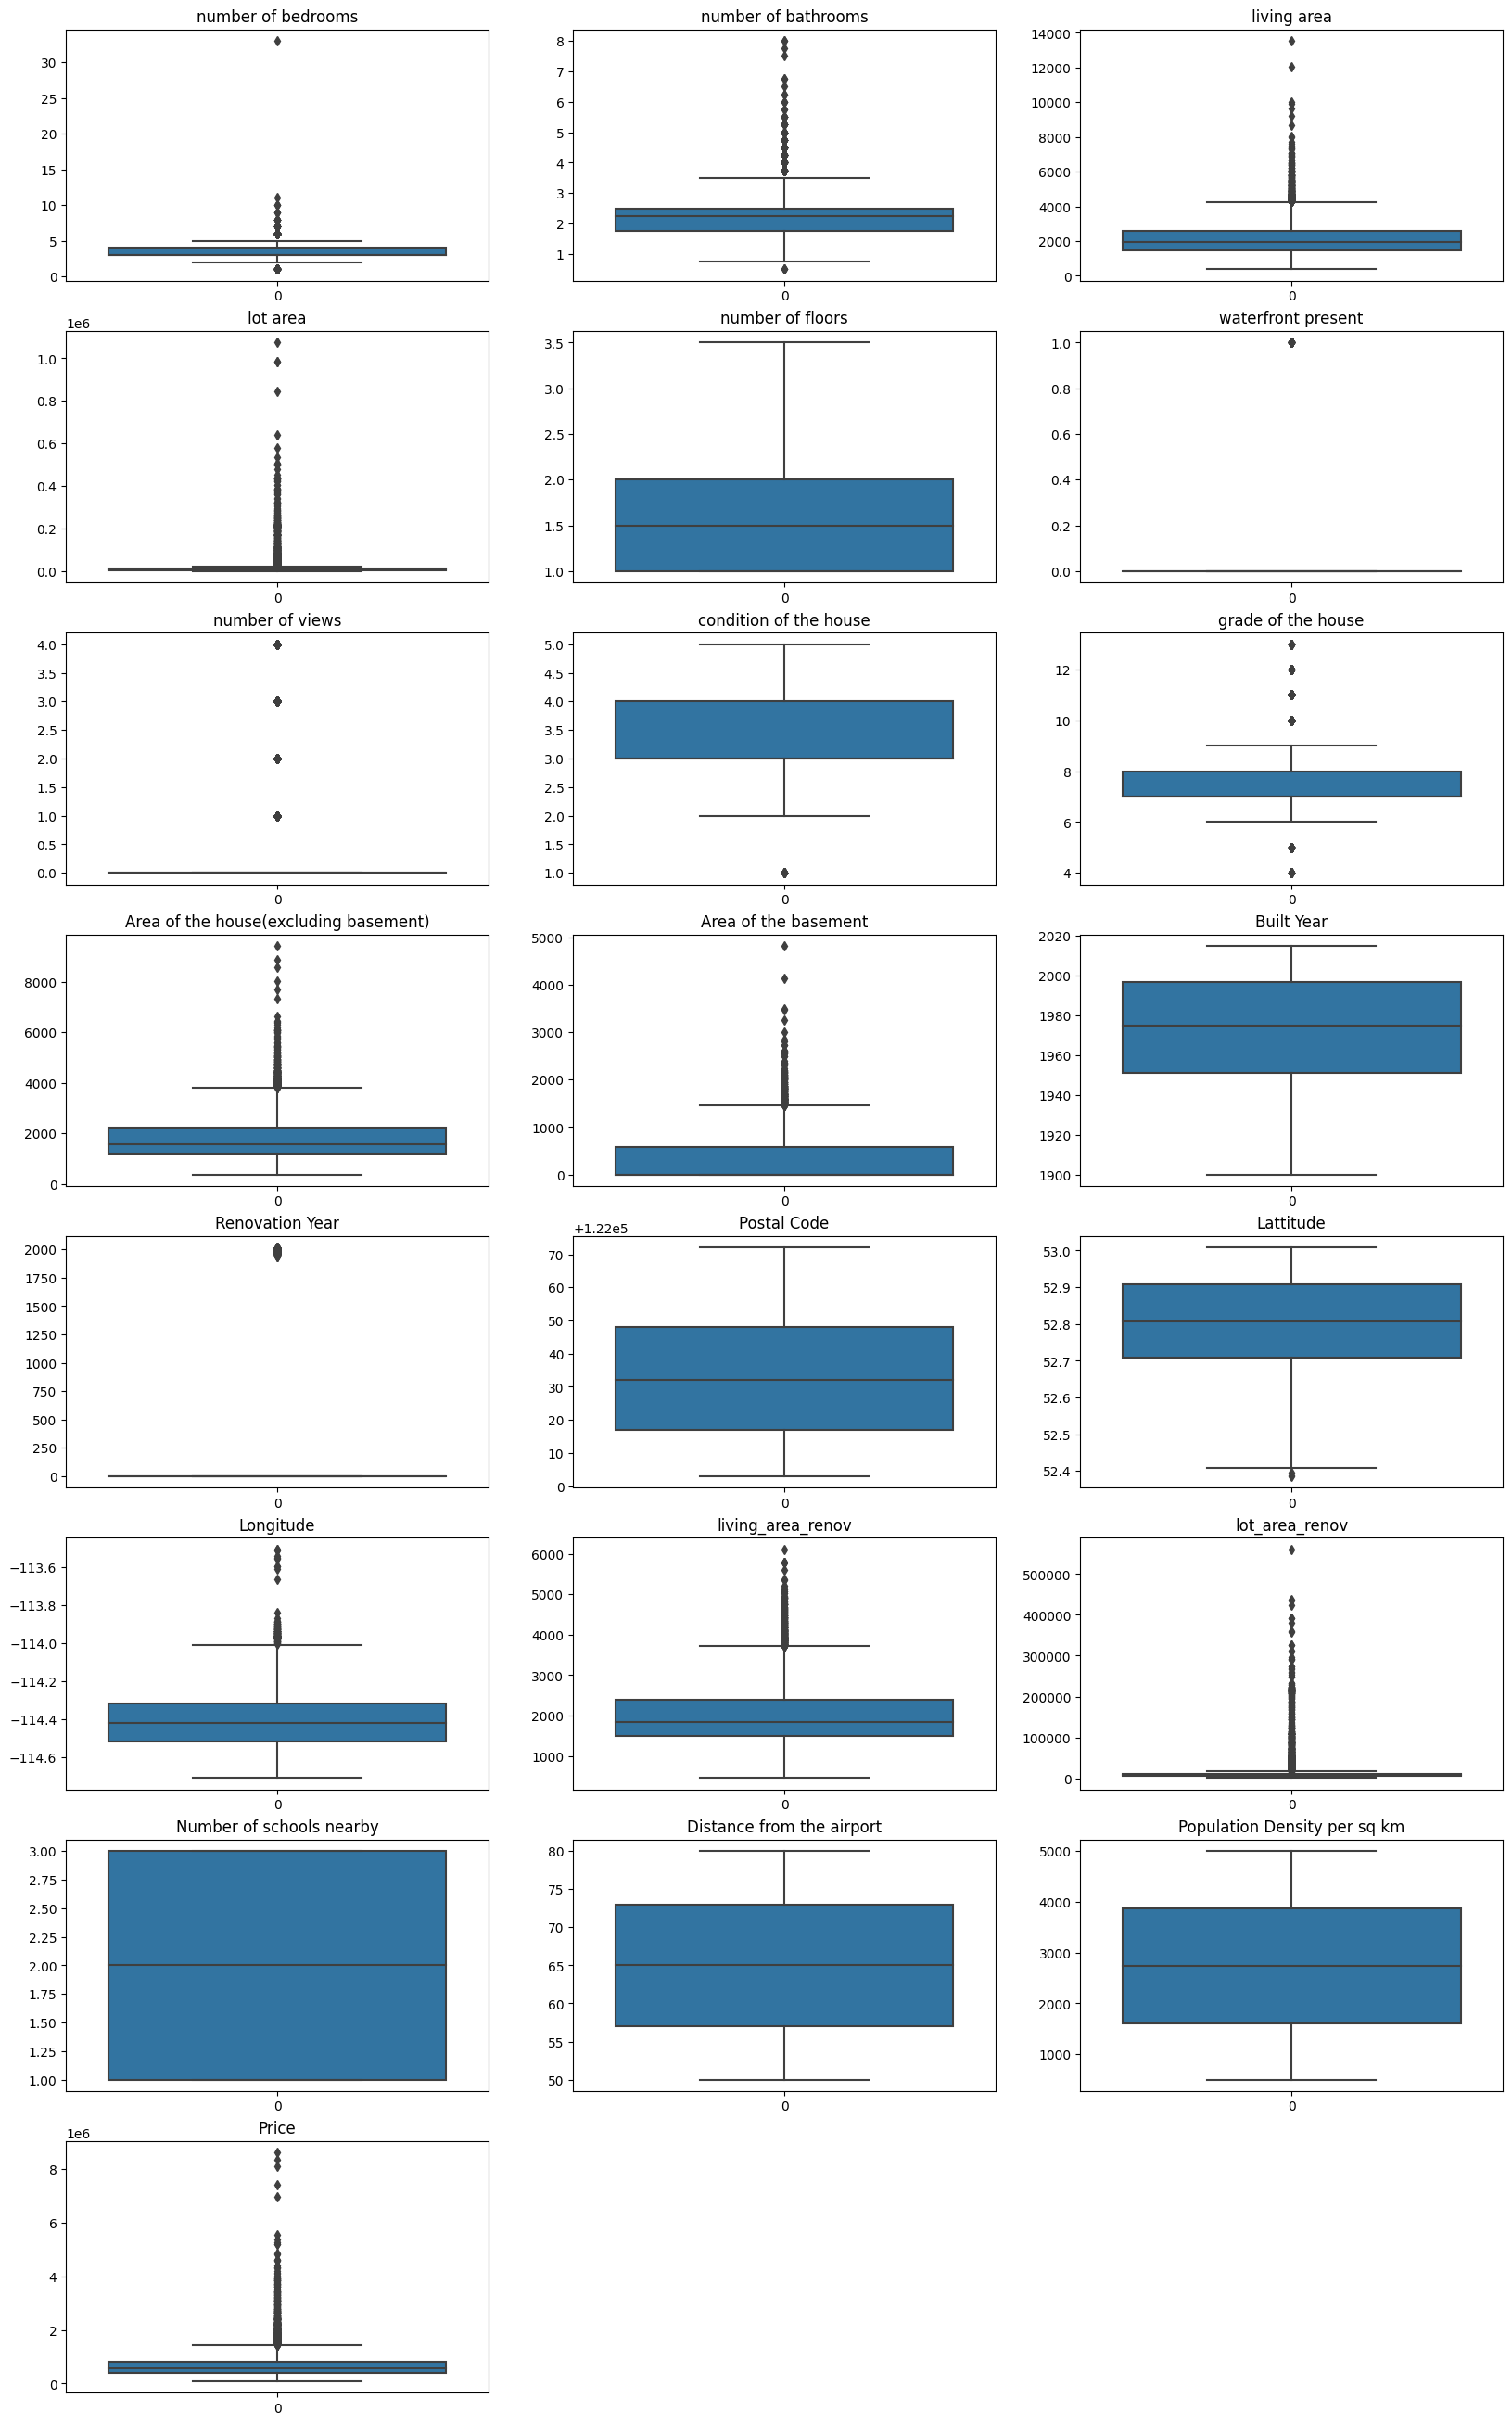

In [11]:
plt.subplots(figsize=(20,50))
i=1
for col in cols:
  plt.subplot(int(len(cols)/2)+1,3,i)
  sns.boxplot(housing_data[col])
  plt.title(col)
  i+=1

As seen above there are lots of outliers in data. Let us drop outliers in data

## Outlier Treatment

In [12]:
#Let's create dataframe containing predictors and the corresponding outlier percetange and check the % of data left after all the outlier removal
numeric_cols=housing_data.select_dtypes(['int64','float64']).columns
outliers_per_dict={}

for i in numeric_cols:
    IQR=housing_data[i].quantile(.75)-housing_data[i].quantile(.25)
    outliers_count=housing_data[(housing_data[i]>(housing_data[i].quantile(.75)+1.5*IQR)) | (housing_data[i]<(housing_data[i].quantile(.25)-1.5*IQR))].shape[0]
    total=housing_data.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per

outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage outliers':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage outliers
0,number of bedrooms,2.47
1,number of bathrooms,2.59
2,living area,2.70
3,lot area,11.30
4,number of floors,0.00
5,waterfront present,0.77
6,number of views,9.73
7,condition of the house,0.12
8,grade of the house,9.03
9,Area of the house(excluding basement),2.75


In [13]:
#Removing outliers from dataframe
df2=housing_data
numeric_cols=['number of bedrooms','number of bathrooms','living area','lot area',
              'number of views','grade of the house','Area of the house(excluding basement)','Area of the basement','lot_area_renov','Price']
for i in numeric_cols:
    IQR=df2[i].quantile(.75)-df2[i].quantile(.25)
    #df2=df2[(df2[i]<(df2[i].quantile(.75)+1.5*IQR)) & (df2[i]>(df2[i].quantile(.25)-1.5*IQR))]
    df2 = df2[~((df2[i] < (df2[i].quantile(.25) - 1.5 * IQR)) |(df2[i] > (df2[i].quantile(.75) + 1.5 * IQR)))]

In [14]:
#% of data lost after above exercises
round(100-df2.shape[0]/housing_data.shape[0]*100,2)

32.4

In [15]:
df2.shape

(9883, 23)

In [16]:
housing_data=df2

In [17]:
for i in numeric_cols:
    IQR=housing_data[i].quantile(.75)-housing_data[i].quantile(.25)
    outliers_count=housing_data[(housing_data[i]>(housing_data[i].quantile(.75)+1.5*IQR)) | (housing_data[i]<(housing_data[i].quantile(.25)-1.5*IQR))].shape[0]
    total=housing_data.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per

outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage outliers after treatment':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage outliers after treatment
0,number of bedrooms,0.00
1,number of bathrooms,0.00
2,living area,0.35
3,lot area,1.38
4,number of floors,0.00
5,waterfront present,0.77
6,number of views,0.00
7,condition of the house,0.12
8,grade of the house,0.00
9,Area of the house(excluding basement),1.51


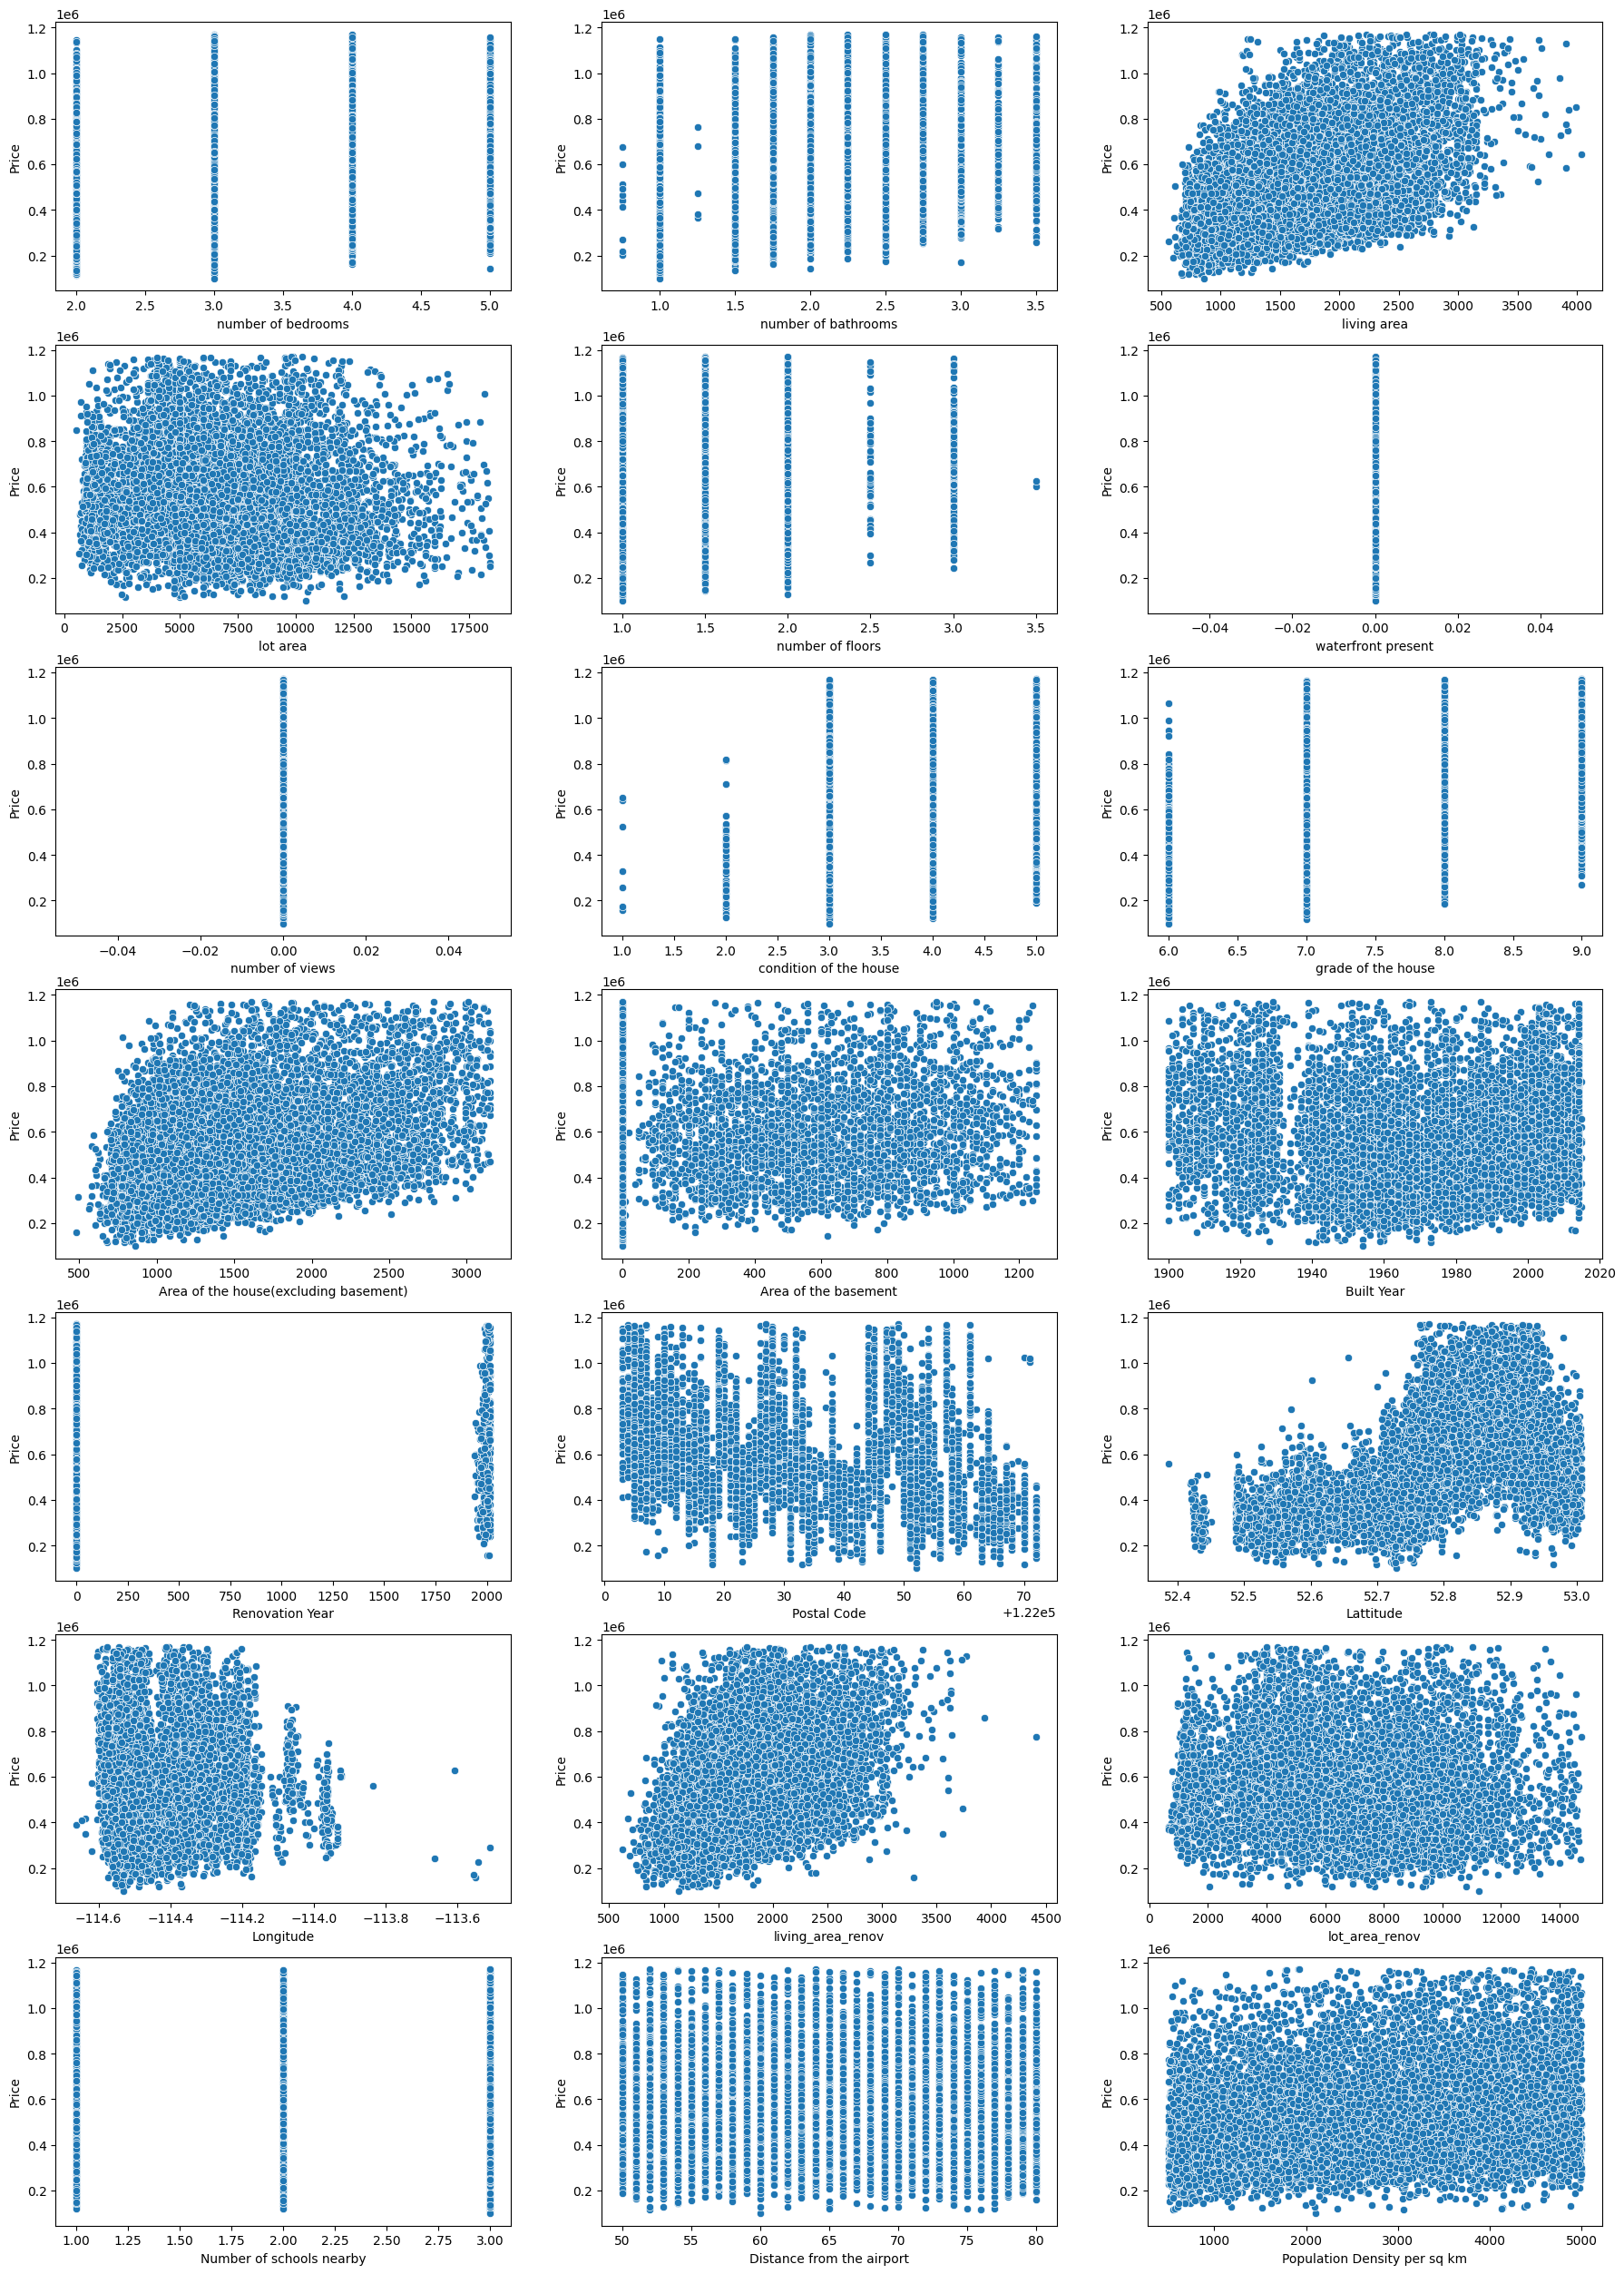

In [18]:
plt.subplots(figsize=(22,50))
i=1
for col in cols[0:-1]:
    plt.subplot(int(len(cols[0:-1])/2)+1,3,i)
    sns.scatterplot(data=housing_data, x=col, y="Price")
    i+=1

In [19]:
housing_data['Renovation Year'].max()

2015

# Data Preperation and Feature Engineering

In [20]:
housing_data['Renovation Year'].value_counts().head()

0       9560
2014      52
2013      16
2006      11
1991      10
Name: Renovation Year, dtype: int64

In [21]:
housing_data['Date'].max()

'9/9/2016'

In [22]:
housing_data['Date'].min()

'10/1/2016'

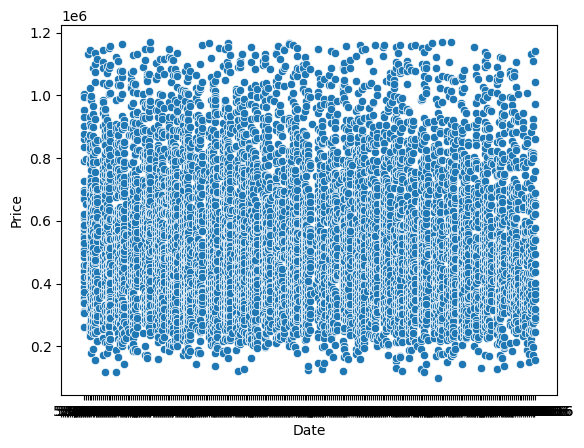

In [23]:
sns.scatterplot(data=housing_data, x='Date', y='Price')
plt.show()

Date column seems to be date of entry of data and thus can be dropped being insignificant to price

In [24]:
housing_data=housing_data.drop(['Date'], axis=1)

In [25]:
print("% Data not available for renovated houses is",
      housing_data[housing_data['Renovation Year'] ==0].shape[0]/housing_data.shape[0]*100,"%")

% Data not available for renovated houses is 96.73176161084692 %


Now where data for rennovation is not avaiable let us put year of built as date of rennovation

In [26]:
housing_data['Renovation Year'] = np.where(housing_data['Renovation Year'] ==0,housing_data['Built Year'], housing_data['Renovation Year'] )

In [27]:
housing_data.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Population Density per sq km,Price
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,1929,122006,52.9047,-114.485,2060,4500,1,51,2480,1004640.0
5,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,1951,122007,52.9133,-114.590,2380,4750,1,67,2590,994610.0
7,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,1923,122006,52.9254,-114.482,1570,10578,3,71,2029,902175.0
9,4,2.25,2200,11250,1.5,0,0,5,7,1300,900,1920,1920,122010,52.9145,-114.391,2320,10814,2,53,3669,954096.2
12,4,2.00,1520,6200,1.5,0,0,3,7,1520,0,1945,1945,122006,52.9080,-114.459,1910,6200,3,80,3472,862208.0


In [28]:
housing_data["Years since rennovation"]= 2016- housing_data['Renovation Year']

In [29]:
housing_data["Years since rennovation"].value_counts().head()

2     305
11    241
13    233
10    219
12    214
Name: Years since rennovation, dtype: int64

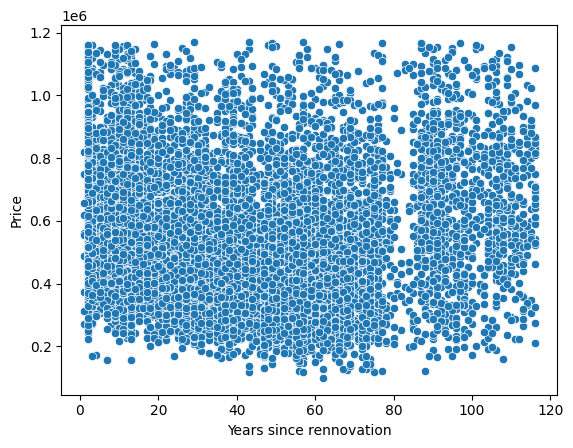

In [30]:
sns.scatterplot(data=housing_data, x='Years since rennovation', y='Price')
plt.show()

The sooner the rennovation price seems to be slightly higher, although there is not a strong relationship

In [31]:
housing_data= housing_data.drop(['Renovation Year'], axis=1)

In [32]:
housing_data['Built Year'].max(), housing_data['Built Year'].min()

(2015, 1900)

In [33]:
housing_data["Age of House"]= 2016-housing_data['Built Year']

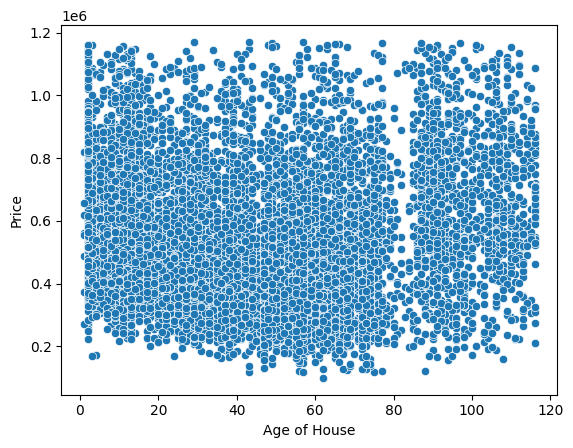

In [34]:
sns.scatterplot(data=housing_data, x='Age of House', y='Price')
plt.show()

Age of house does not seems to be having any effect on price

In [35]:
housing_data= housing_data.drop(['Built Year'], axis=1)

Regarding geographical location we have three variables latitute, longitude and postcode. As latitute and longitude also represent geographical location, deleting postcode variable.


In [36]:
housing_data=housing_data.drop(["Postal Code"], axis = 1)

In [37]:
housing_data.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Population Density per sq km,Price,Years since rennovation,Age of House
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,52.9047,-114.485,2060,4500,1,51,2480,1004640.0,87,87
5,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,52.9133,-114.590,2380,4750,1,67,2590,994610.0,65,65
7,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,52.9254,-114.482,1570,10578,3,71,2029,902175.0,93,93
9,4,2.25,2200,11250,1.5,0,0,5,7,1300,900,52.9145,-114.391,2320,10814,2,53,3669,954096.2,96,96
12,4,2.00,1520,6200,1.5,0,0,3,7,1520,0,52.9080,-114.459,1910,6200,3,80,3472,862208.0,71,71


In [38]:
#Lets check correlation in data

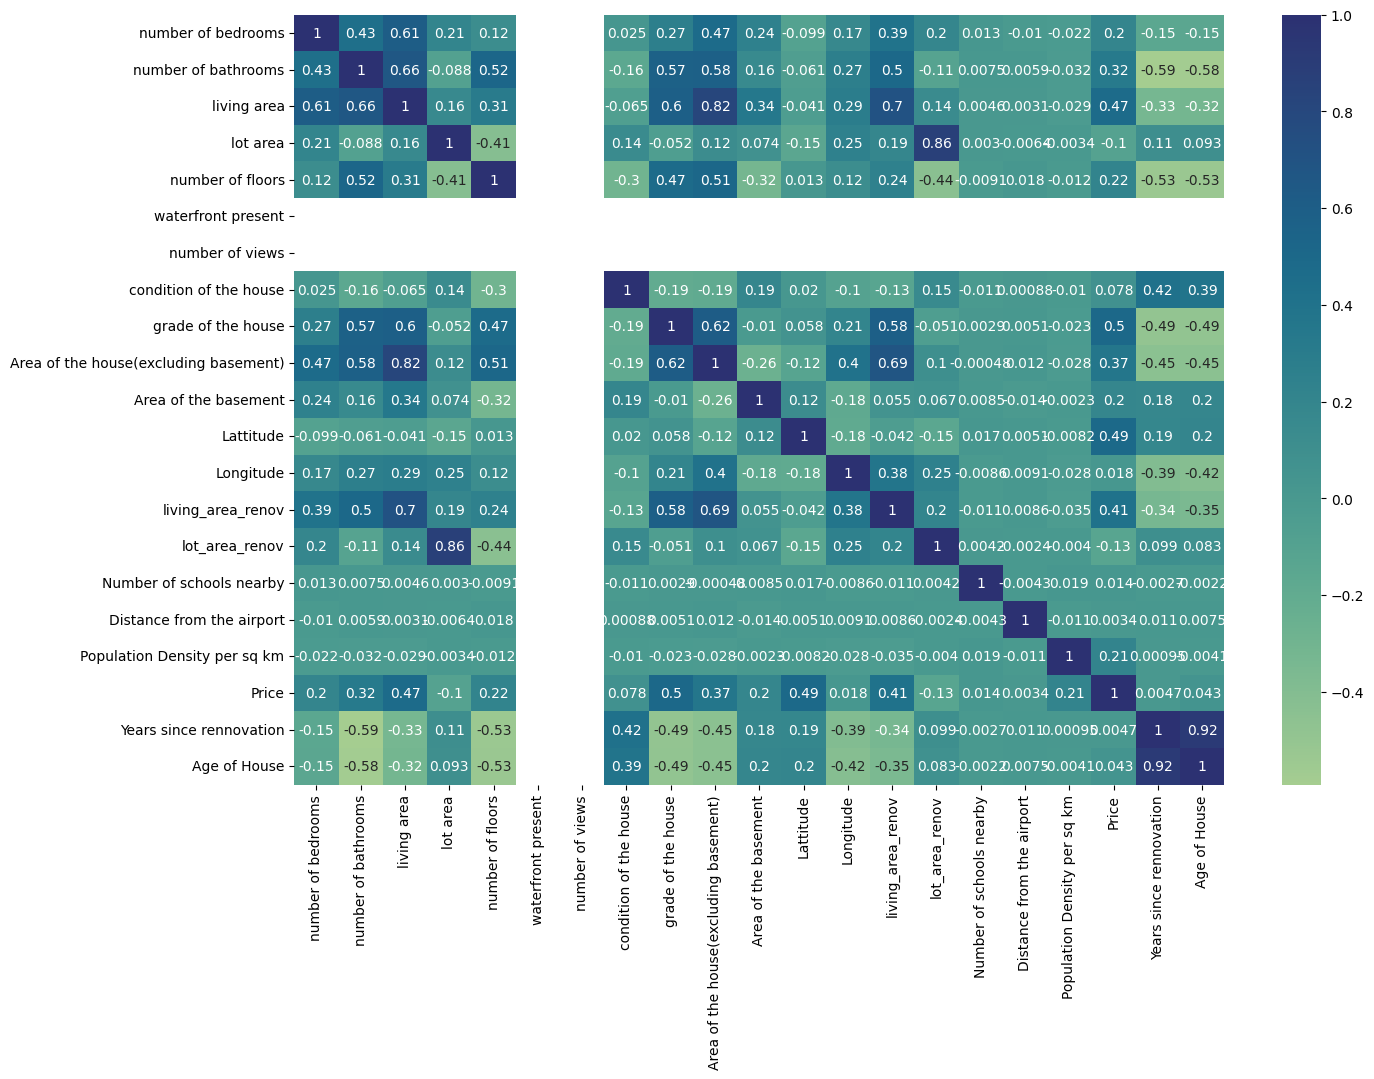

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(housing_data.corr(), annot=True, cmap="crest")
plt.show()

- Price has a high correlation with living area, grade of house, are of house excluding basement, living area renov
- Further there correlation between `age of house and years since rennovation`, `lot area and lot area renov`,`living area and area of house excluding basement`, `grade of house and living area`


In [40]:
housing_data.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport',
       'Population Density per sq km', 'Price', 'Years since rennovation',
       'Age of House'],
      dtype='object')

To reduce multicollinearity let us drop following features:
-

In [41]:
housing_data=housing_data.drop(["Years since rennovation","lot_area_renov","Area of the house(excluding basement)"], axis=1)

In [97]:
#We will drop columns after checking performance of baseline model

# Test train split

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [43]:
X_housing_data = housing_data.drop(["Price"], axis=1)
y_housing_data=housing_data['Price']

In [44]:
X_housing_data_train,X_housing_data_test,y_housing_data_train,y_housing_data_test =\
                                                   train_test_split(X_housing_data, y_housing_data,train_size=0.7, random_state=100)

In [45]:
X_housing_data_train.shape, X_housing_data_test.shape,y_housing_data_train.shape,y_housing_data_test.shape

((6918, 17), (2965, 17), (6918,), (2965,))

In [46]:
X_housing_data_train.head(2)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the basement,Lattitude,Longitude,living_area_renov,Number of schools nearby,Distance from the airport,Population Density per sq km,Age of House
12095,4,1.5,2500,9448,1.0,0,0,4,7,1250,52.7512,-114.529,1640,3,68,1039,50
3543,4,2.5,2070,5415,2.0,0,0,3,8,0,52.8006,-114.196,2120,3,59,3302,20


In [47]:
y_housing_data_train.head(2)

12095    364287.0
3543     768855.6
Name: Price, dtype: float64

# Model Building

In [48]:
lr_model= LinearRegression()

In [49]:
lr_model.fit(X_housing_data_train,y_housing_data_train)

LinearRegression()

In [50]:
lr_model.score(X_housing_data_train,y_housing_data_train)

0.6717674772961708

In [51]:
y_housing_data_test_pred=lr_model.predict(X_housing_data_test)

In [52]:
lr_model.score(X_housing_data_test,y_housing_data_test)

0.6698912402529198

# Residual Analysis

In [53]:
res=y_housing_data_test_pred-y_housing_data_test

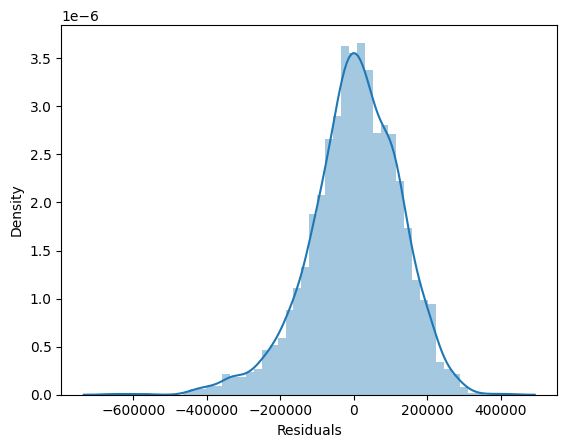

In [54]:
#Validiating Linear Regresion assumptions
sns.distplot(res)
plt.xlabel("Residuals")
plt.show()

Errors are normally distributed

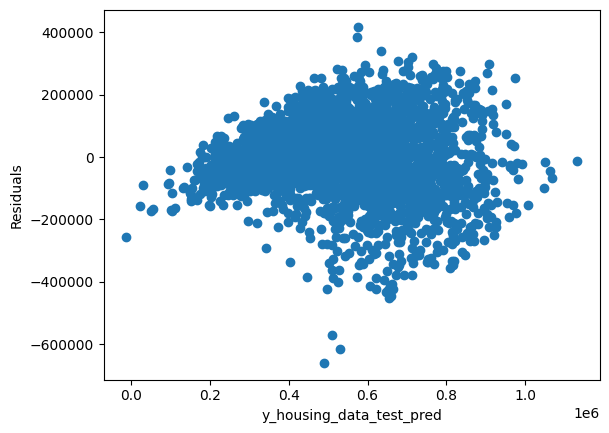

In [55]:
plt.scatter(y_housing_data_test_pred,res)
plt.xlabel("y_housing_data_test_pred")
plt.ylabel("Residuals")
plt.show()

homoskedasticity is evident from plot above

# Tree Based Models

1. Decison Tree model

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_housing_data_train, y_housing_data_train)

DecisionTreeRegressor()

In [61]:
dt_model.score(X_housing_data_train, y_housing_data_train)

1.0

In [62]:
y_housing_data_test_pred_dt = dt_model.predict(X_housing_data_test)
dt_model.score(X_housing_data_test, y_housing_data_test)

0.6635521802301256

Model is clearly overfitting.

# Random Forest model

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_housing_data_train, y_housing_data_train)

RandomForestRegressor()

In [64]:
rf_model.score(X_housing_data_train, y_housing_data_train)

0.9772378899179842

In [65]:
y_housing_data_test_pred_rf = rf_model.predict(X_housing_data_test)
rf_model.score(X_housing_data_test, y_housing_data_test)

0.8511442678057027

Model performance has significantly improved, however theres is overfitting as there is significant differenece between Train and test acc. We will defiently go for HPT for RF

# Support Vector Machine (SVM) model

In [66]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_housing_data_train, y_housing_data_train)

SVR()

In [67]:
svm_model.score(X_housing_data_train, y_housing_data_train)

-0.02675859554369242

In [68]:
y_housing_data_test_pred_svm = svm_model.predict(X_housing_data_test)
svm_model.score(X_housing_data_test, y_housing_data_test)

-0.022828831922736548

No need for comment as per results :P

# K-nearest neighbors (KNN) model

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_housing_data_train, y_housing_data_train)

KNeighborsRegressor()

In [70]:
knn_model.score(X_housing_data_train, y_housing_data_train)

0.5372416820822612

In [71]:
y_housing_data_test_pred_knn = knn_model.predict(X_housing_data_test)
knn_model.score(X_housing_data_test, y_housing_data_test)

0.3005019519422978

Probably not the best model for this project

# Gradient Boosting model

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_housing_data_train, y_housing_data_train)

GradientBoostingRegressor()

In [73]:
gb_model.score(X_housing_data_train, y_housing_data_train)

0.8561621340886958

In [74]:
y_housing_data_test_pred_gb = gb_model.predict(X_housing_data_test)
gb_model.score(X_housing_data_test, y_housing_data_test)

0.831828626500961

This probably the best performing model with decent acc so far and there is no overfitting or underfitting

# Model Comparison

In [85]:
models = ['lr_model', 'dt_model', 'rf_model', 'svm_model', 'knn_model', 'gb_model']
scores = [lr_model.score(X_housing_data_test, y_housing_data_test),
         dt_model.score(X_housing_data_test, y_housing_data_test),
         rf_model.score(X_housing_data_test, y_housing_data_test),
         svm_model.score(X_housing_data_test, y_housing_data_test),
         knn_model.score(X_housing_data_test, y_housing_data_test),
         gb_model.score(X_housing_data_test, y_housing_data_test)]

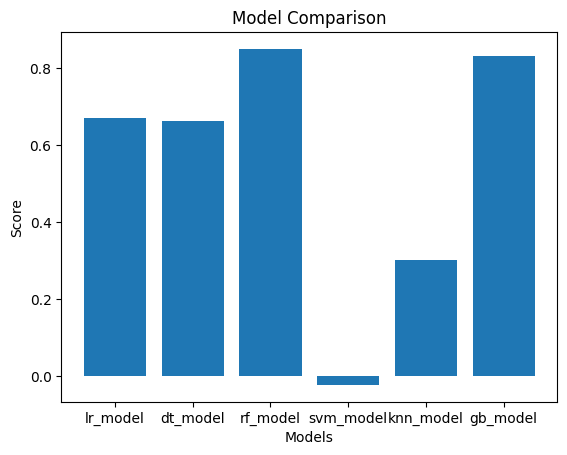

In [88]:
plt.bar(models, scores)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Comparison")
plt.show()

Gradient Boosting model has the highest score on the test set, so it is the best model. Let us perform Hyper paramter Tunning on GB model

# Hyperparameter Tuning

In [89]:
# Let's tune the hyperparameters of the Gradient Boosting model to see if we can improve its performance.
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(gb_model, parameters, n_jobs=-1)

In [90]:
grid_search.fit(X_housing_data_train, y_housing_data_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [92]:
best_model = grid_search.best_estimator_

In [95]:
# prompt: model paramters of best model in Gradient boost

best_model.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [91]:
best_model.score(X_housing_data_test, y_housing_data_test)

0.8765639017583302

In [96]:
# The best hyperparameters for the Gradient Boosting model are:
# - n_estimators = 300
# - max_depth = 5
# - learning_rate = 0.1
# The best model has a score of 0.87 on the test set

In this project, we used data from the Kaggle Housing Prices competition to predict the price of houses. We explored a variety of machine learning models, including Linear Regression, Decision Trees, Random Forests, Support Vector Machines, K-nearest neighbors, and Gradient Boosting. We used a train-test split to evaluate the performance of each model and selected the best model based on its score on the test set. We then tuned the hyperparameters of the best model to further improve its performance. In the end, we achieved a score of 0.87 on the test set, which is a good result.